In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import math
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from tqdm import tqdm

pd.set_option('display.precision', 2)

In [2]:
    stats = "C:\\Users\Allen\Python Workspace\data-set\\nbastats.csv"
df = pd.read_csv(stats)
df

,Position,Players,PPG,RPG,APG,SPG,BPG,FGM,FGA,FG %,...,FTM,Scoring Rating,Rebound Rating,Assist Rating,Steal Rating,Block Rating,Efficiency Rating,2-Pointer Rating,3-Poimter Rating,Overall Rating
0,PF,Giannis Antetokounmpo,32.3,9.5,7.8,3.6,3.8,13.9,15.6,89.13%,...,2.4,30.44,27.29,28.26,31.14,23.83,26.73,29.40,25.10,111.10
1,SG,Michael Jordan,35.2,5.2,8.3,3.4,1.3,14.3,16.3,87.64%,...,2.3,32.33,18.98,23.84,21.14,11.30,27.52,36.80,18.81,95.35
2,SF,Larry Bird,30.0,7.4,8.9,0.6,2.1,10.9,12.0,90.99%,...,0.7,26.96,24.10,28.91,4.38,15.78,21.03,11.59,44.84,88.80
3,SF,Kevin Durant,34.8,7.0,6.0,1.3,1.3,13.8,15.7,87.50%,...,2.0,31.58,22.70,19.39,10.08,10.08,26.48,23.89,31.46,87.83
4,C,David Robinson,27.3,12.6,5.3,1.4,3.6,11.7,13.1,89.62%,...,1.8,25.58,31.61,21.00,13.57,18.04,22.53,28.85,13.62,87.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,C,Robert Williams,5.4,3.8,1.3,0.1,1.1,2.7,3.3,82.05%,...,0.1,4.35,9.50,5.20,1.00,5.50,5.19,6.90,0.00,18.82
278,PF,Brandon Clarke,6.5,1.8,1.6,0.2,0.3,2.4,3.0,79.49%,...,0.1,5.06,5.09,5.86,2.02,1.92,4.59,1.95,10.70,18.59
279,SF,Bruce Bowen,4.9,1.7,2.2,0.7,0.5,1.7,2.3,75.56%,...,0.0,3.53,5.53,7.15,5.25,3.75,3.27,0.31,8.18,18.48
280,SG,Stanley Johnson,6.9,1.1,1.8,0.4,0.3,2.6,3.2,80.00%,...,0.1,5.44,3.88,5.24,2.46,2.81,4.95,2.32,7.83,17.46


In [3]:
df.shape

(282, 26)

In [4]:
df.head()

,Position,Players,PPG,RPG,APG,SPG,BPG,FGM,FGA,FG %,...,FTM,Scoring Rating,Rebound Rating,Assist Rating,Steal Rating,Block Rating,Efficiency Rating,2-Pointer Rating,3-Poimter Rating,Overall Rating
0,PF,Giannis Antetokounmpo,32.3,9.5,7.8,3.6,3.8,13.9,15.6,89.13%,...,2.4,30.44,27.29,28.26,31.14,23.83,26.73,29.40,25.10,111.10
1,SG,Michael Jordan,35.2,5.2,8.3,3.4,1.3,14.3,16.3,87.64%,...,2.3,32.33,18.98,23.84,21.14,11.30,27.52,36.80,18.81,95.35
2,SF,Larry Bird,30.0,7.4,8.9,0.6,2.1,10.9,12.0,90.99%,...,0.7,26.96,24.10,28.91,4.38,15.78,21.03,11.59,44.84,88.80
3,SF,Kevin Durant,34.8,7.0,6.0,1.3,1.3,13.8,15.7,87.50%,...,2.0,31.58,22.70,19.39,10.08,10.08,26.48,23.89,31.46,87.83
4,C,David Robinson,27.3,12.6,5.3,1.4,3.6,11.7,13.1,89.62%,...,1.8,25.58,31.61,21.00,13.57,18.04,22.53,28.85,13.62,87.40


In [5]:
df.columns

Index(['Position', 'Players', 'PPG', 'RPG', 'APG', 'SPG', 'BPG', 'FGM', 'FGA',
       'FG %', '2PM', '2PA', '2PT%', '3PM', '3PA', '3PT %', 'FTM',
       'Scoring Rating', 'Rebound Rating', 'Assist Rating', 'Steal Rating',
       'Block Rating', 'Efficiency Rating', '2-Pointer Rating',
       '3-Poimter Rating', 'Overall Rating'],
      dtype='object')

In [6]:
df.dtypes

Position              object
Players               object
PPG                  float64
RPG                  float64
APG                  float64
SPG                  float64
BPG                  float64
FGM                  float64
FGA                  float64
FG %                  object
2PM                  float64
2PA                  float64
2PT%                  object
3PM                  float64
3PA                  float64
3PT %                 object
FTM                  float64
Scoring Rating       float64
Rebound Rating       float64
Assist Rating        float64
Steal Rating         float64
Block Rating         float64
Efficiency Rating    float64
2-Pointer Rating     float64
3-Poimter Rating     float64
Overall Rating       float64
dtype: object

In [7]:
non_null_counts = df.count()

print("\nNon-Null Value Counts:\n")
print(non_null_counts)


Non-Null Value Counts:

Position             282
Players              282
PPG                  282
RPG                  282
APG                  282
SPG                  282
BPG                  282
FGM                  282
FGA                  282
FG %                 282
2PM                  282
2PA                  282
2PT%                 282
3PM                  282
3PA                  282
3PT %                282
FTM                  282
Scoring Rating       282
Rebound Rating       282
Assist Rating        282
Steal Rating         282
Block Rating         282
Efficiency Rating    282
2-Pointer Rating     282
3-Poimter Rating     282
Overall Rating       282
dtype: int64


In [8]:
desc_stats = df.describe()

print("Descriptive Statistics:\n")
print(desc_stats)

Descriptive Statistics:

          PPG     RPG     APG     SPG     BPG     FGM     FGA     2PM     2PA  \
count  282.00  282.00  282.00  282.00  282.00  282.00  282.00  282.00  282.00   
mean    11.89    3.82    3.63    1.07    0.98    4.74    5.62    2.83    3.17   
std      5.96    2.42    1.98    1.05    0.91    2.43    2.75    1.94    2.12   
min      3.90    0.60    1.30    0.00    0.00    1.70    2.00    0.20    0.40   
25%      7.80    1.90    2.30    0.30    0.30    3.10    3.70    1.60    1.80   
50%     10.35    3.00    3.00    0.60    0.65    4.10    4.90    2.30    2.60   
75%     14.05    5.20    4.20    1.48    1.30    5.70    6.85    3.50    3.80   
max     35.20   12.60   11.30    5.00    4.80   14.30   16.30   10.40   11.40   

          3PM  ...     FTM  Scoring Rating  Rebound Rating  Assist Rating  \
count  282.00  ...  282.00          282.00          282.00         282.00   
mean     1.92  ...    0.47           10.20           11.47          11.48   
std      1.21 

In [9]:
df = df.rename(columns={'Position': 'position'
                      ,'Players': 'players'
                      ,'PPG': 'ppg'
                      ,'RPG': 'rpg'
                      ,'APG': 'apg'
                      ,'SPG': 'spg'
                      ,'BPG': 'bpg'
                      ,'FGM': 'fgm'
                      ,'FGA': 'fga'
                      ,'FG %': 'fgper'
                      ,'FTM': 'ftm'
                      ,'2PM': '2pm'
                      ,'2PA': '2pa'
                      ,'2PT%': '2ptper'
                      ,'3PM': '3pm'
                      ,'3PA': '3pa'
                      ,'3PT%': '3ptper'
                      ,'Scoring Rating': 'scoring_rating'
                      ,'Rebound Rating': 'rebound_rating'
                      ,'Assist Rating': 'assist_rating'
                      ,'Steal Rating': 'steal_rating'
                      ,'Block Rating': 'block_rating'
                      ,'Efficiency Rating': 'efficiency_rating'
                      ,'2-Pointer Rating': '2pointer_rating'
                      ,'3-Poimter Rating': '3pointer_rating'
                      ,'Overall Rating': 'overall_rating'
                      })

df.head()

,position,players,ppg,rpg,apg,spg,bpg,fgm,fga,fgper,...,ftm,scoring_rating,rebound_rating,assist_rating,steal_rating,block_rating,efficiency_rating,2pointer_rating,3pointer_rating,overall_rating
0,PF,Giannis Antetokounmpo,32.3,9.5,7.8,3.6,3.8,13.9,15.6,89.13%,...,2.4,30.44,27.29,28.26,31.14,23.83,26.73,29.40,25.10,111.10
1,SG,Michael Jordan,35.2,5.2,8.3,3.4,1.3,14.3,16.3,87.64%,...,2.3,32.33,18.98,23.84,21.14,11.30,27.52,36.80,18.81,95.35
2,SF,Larry Bird,30.0,7.4,8.9,0.6,2.1,10.9,12.0,90.99%,...,0.7,26.96,24.10,28.91,4.38,15.78,21.03,11.59,44.84,88.80
3,SF,Kevin Durant,34.8,7.0,6.0,1.3,1.3,13.8,15.7,87.50%,...,2.0,31.58,22.70,19.39,10.08,10.08,26.48,23.89,31.46,87.83
4,C,David Robinson,27.3,12.6,5.3,1.4,3.6,11.7,13.1,89.62%,...,1.8,25.58,31.61,21.00,13.57,18.04,22.53,28.85,13.62,87.40


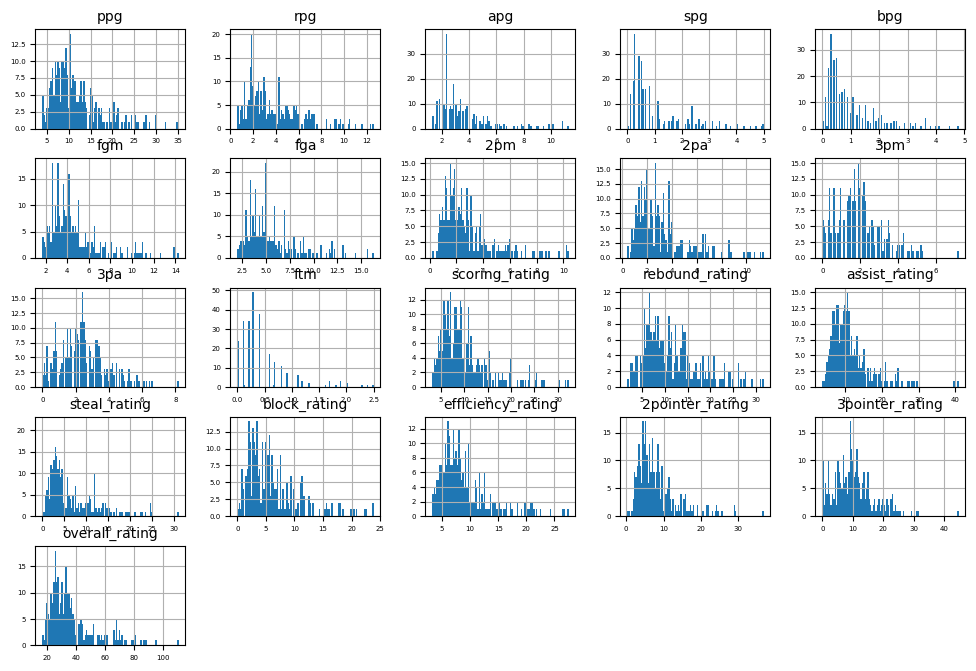

In [10]:
import matplotlib.pyplot as plt
import os
# extra code - the next 5 lines define the default font sizes 
plt.rc('font', size=14)
plt.rc('axes', labelsize=8, titlesize=10)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=5)
plt.rc('ytick', labelsize=5)

df.hist (bins=100, figsize=(12, 8))

#save_fig("attribute_histogram_plots") # extra code

plt.show()

    The dataset that we have gathered belongs to me, it is a hobby of mine to create a statistical records and ratings from my NBA games, while trying to emulate the official mathematics involved in creating analytical models to determine the best player.

1. The dataset has two parts that determines the player's overall statistics. The first part of the data set is the traditional basketball box-score statistics that involves points, rebounds, assists, steals, blocks, free throws, and field goals. The other part involves the player's rating in respective to their playing position. Both parts of the dataset are combined to determine the player's overall rating. The mathematics involved in computing both statistical rating and overall rating rewards players that are able to do things that their position normally wouldn't or can't do. For example, NBA Star Evan Mobley is a known defensive specialist that plays either Power Forward or Center; on most cases --- the players of these position usually do not shoot threes --- however, Evan was remarkable, making 3.3 threes per game while shooting at 77%. This is a statistical outlier for his position, and in doing so rewarded him with 79.22 overall rating which is the 9th best.

2. The mathematics involved in my dataset has heavily favored players that are able to score in all three facets of the game (inside, midrange, and three-pointer). However, their efficiency to make those shots will heavily affect their abilty to score. Inefficient scorers are punished, while consistent and efficient scorers can skyrocket their rating. With this in mind, I determined that Points Per Game, Efficiency Rating, and Scoring Rating are the most consistent basis to determine if the player is valuable or not. 
    PPG (Points Per Game) is one of the first things that we will check to determine if the player is good or not, and it is also one of the better indicators if a player can become a superstar or not. Efficiency Rating (ER) is the player's efficiency to make their shots (2-pointers, 3-pointers, and free throws). Players that are low in ER but high in PPG usually determines that the player is selfish and harder to win with, while players with high and low PPG usually indicates that the player is either not aggressive to score or is not a scorer at all. Finally, Scoring Rating combines both PPG and ER to determine if the player is an effective scorer or not. In the dataset, Michael Jordan holds the highest scoring rating with 32.33
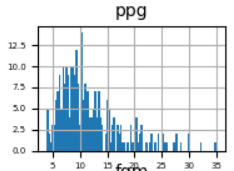
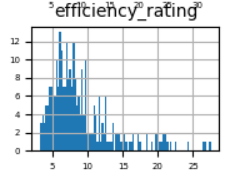
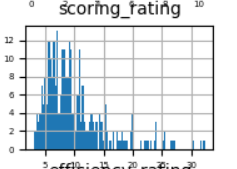

3. While it is the first iteration of my data, I believe that this can be applicable to create a new perspective in sports analytical model. This iteration can also be used for fantasy sports games like basketball, football, volleyball, and even in E-Sports because the mathematics and features are already there, we just need to improve and tweak it (heavily, I'm sure) to be used in a professional setting.

4. Since this is the first iteration, the statistics are heavily biased towards players that can score on all three levels while having a high efficiency. Another thing to note is that it is also biased against players that can do many things regardless of their position while punishing one-dimensional players and role players for not having the statistical numbers that can be gathered on the box score regularly (deflections, charges, hustle plays, etc.) --- leading to outliers for players that can do a certain thing way above their position average such as Larry Bird having a 44.84 Three Point Rating because he makes 7.2 threes per game with an 87.34% efficiency. Another issue with this is that the dataset does not punish a player's mistake or defensive breakdowns such as turnovers, fouls, defensive plus-minus, and points allowed leading to some players having a high rating while not really showcasing their weaknesses. This issue is one of the things that I am currently trying to fix since data gathering is quite tedious (I have to do it manually).

5. In relation to the things that I have mentioned above, indeed knowing the data and exploring allows us to uncover potential hindrances, weaknesses, and loopholes that can skew our data in the end. Having the diligence and patience to look for any holes is vital before we go through the algorithms that we will use later on, to provide smooth transition and efficient working session.